In [12]:
import spacy
import numpy as np
import seaborn as sns

from spacy import displacy
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt

sns.set_style("darkgrid")
nlp = spacy.load('en_core_web_sm')

# Warmup: Computing word frequencies

In [2]:
def count_word_frequencies(YOUR_FILE, ENCODING):

    freqs = Counter()
    with open(YOUR_FILE, encoding = ENCODING) as f:
        for line in f:
            tokens = line.lower().split()
            for token in tokens:
                freqs[token] += 1
                
    return freqs

In [3]:
def count_word_pairs(YOUR_FILE, ENCODING):
    
    freqs = defaultdict(Counter)
    with open(YOUR_FILE, encoding = ENCODING) as f:
        for line in f:
            tokens = line.lower().split()
            for t1, t2 in zip(tokens, tokens[1:]):
                freqs[t1][t2] += 1
    
    return freqs

In [21]:
wiki_freqs = count_word_frequencies("a1_data/wikipedia.txt", 'utf-8')
wiki_freqs.most_common()[0:10]

[('the', 3158463),
 (',', 2566261),
 ('.', 1956600),
 ('of', 1534698),
 ('and', 1260516),
 ('in', 1205759),
 ('a', 958283),
 ('to', 926287),
 ('-', 548244),
 ('is', 522101)]

In [13]:
euro_freqs = count_word_frequencies("a1_data/europarl.txt", 'utf-8')
euro_freqs.most_common()[0:10]

[('the', 3003965),
 (',', 2115604),
 ('.', 1536632),
 ('of', 1422333),
 ('to', 1341441),
 ('and', 1158234),
 ('in', 945160),
 ('that', 732156),
 ('a', 674231),
 ('is', 671969)]

In [4]:
book_freqs = count_word_frequencies("a1_data/books.txt", 'ISO-8859-1')
book_freqs.most_common()[0:10]

[('the', 2425678),
 (',', 2064433),
 ('.', 1958494),
 ('and', 1367843),
 ('of', 1321821),
 ('to', 1159024),
 ('a', 1103939),
 ('is', 792900),
 ('in', 739009),
 ('i', 704436)]

In [24]:
wiki_pairs = count_word_pairs("a1_data/wikipedia.txt", 'utf-8')
wiki_pairs["red"].most_common()[1:10]

[('sox', 495),
 ('and', 467),
 ('-', 454),
 ('army', 404),
 ('cross', 278),
 ('.', 213),
 ('wings', 208),
 ('sea', 177),
 ('river', 166)]

In [25]:
euro_pairs = count_word_pairs("a1_data/europarl.txt", 'utf-8')
euro_pairs["red"].most_common()[1:10]

[('cross', 214),
 ('card', 54),
 ('lines', 37),
 ('and', 26),
 ('army', 26),
 ('light', 25),
 ('line', 23),
 (',', 22),
 ('.', 18)]

In [26]:
book_pairs = count_word_pairs("a1_data/books.txt", 'ISO-8859-1')
book_pairs["red"].most_common()[1:10]

[('herrings', 175),
 (',', 132),
 ('army', 126),
 ('and', 104),
 ('riding', 83),
 ('wine', 75),
 ('october', 69),
 ('cross', 65),
 ('"', 65)]

# Investigating the word frequency distribution 

In [27]:
def plot_rank_frequency(freqs, plot_length):

    fig_size = (15, 5)
    font_size = 15
    x_vec = []
    y_vec = []
    
    common_words = freqs.most_common()[0:plot_length+1]

    for i in range(plot_length):
        x_vec.append(i)
        y_vec.append(common_words[i][1])

    f,(ax1, ax2) = plt.subplots(1, 2, figsize= fig_size)
    ax1.plot(x_vec, y_vec)
    ax1.set_xlabel("Rank of the word")
    ax1.set_ylabel("Frequency of the word")
    ax1.set_title("Rank/frequency plot of the " + str(plot_length) + " most common words.", fontsize = font_size)

    ax2.loglog(x_vec, y_vec)
    ax2.set_xlabel("Rank of the word")
    ax2.set_ylabel("Frequency of the word")
    ax2.set_title("Rank/frequency plot, in log-log scale.", fontsize = font_size)

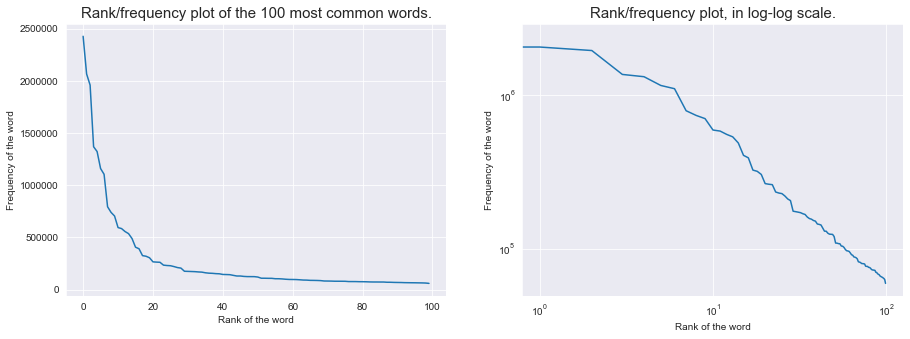

In [28]:
plot_rank_frequency(book_freqs, 100)

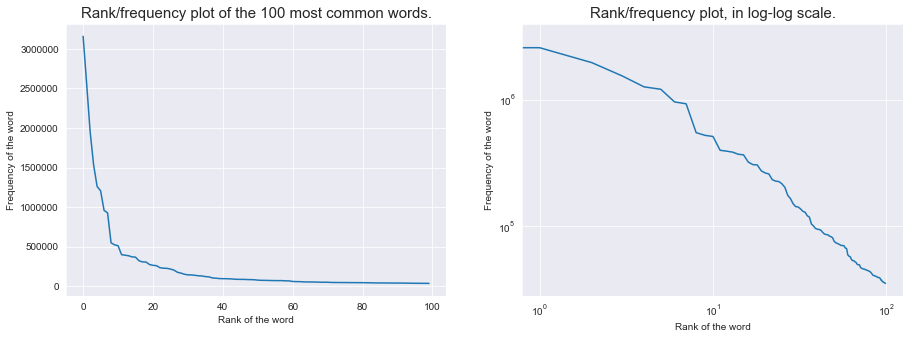

In [29]:
plot_rank_frequency(wiki_freqs, 100)

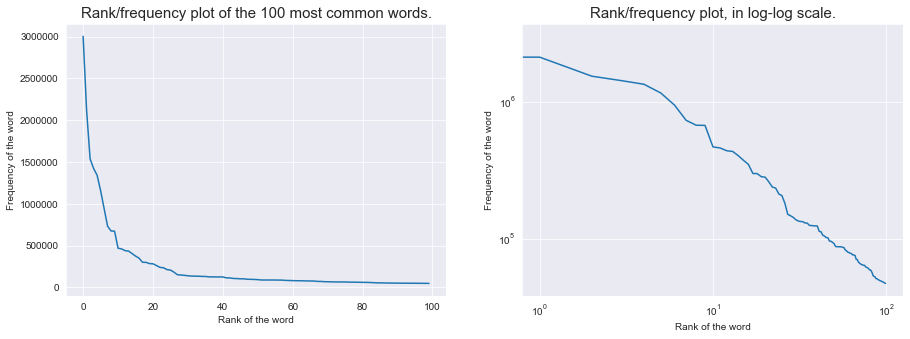

In [30]:
plot_rank_frequency(euro_freqs, 100)

## Reflection

The rank/frequency plots show for each corpus shows that a few short words occur very frequently, but that the frequency decreases quickly for less common words. This uneven distribution should make it harder to train machine learning models on language data - key words occur rarely in training data, but are very important for the model's understanding. 

Zipf's law states that for a given corpus, the frequency of any word is inversely proportional to its rank in the frequency table. Thus, on a log-log scale we expect the rank/frequency plot to take the form of a straigt line (with a negative slope). This appears to be a good fit for the Wikipedia corpus. For both the European Parlaiment and the Book Reviews corpora, the rank/frequency plot has a smaller slope initially but follows Zipf's law well for higer rank words. 

# Comparing corpora

In [31]:
# What words are "typical" of the European Parliament corpus when we compare it to the book review corpus, 
# or vice versa? You will have to come up with your own operationalization of the notion of "typical" here.

# My idea: find 50 most common words for each corpus
# check which words are only on the top 50 list for one of the corpora

compare_length = 50

euro_common = euro_freqs.most_common()[0:compare_length+1]
book_common = book_freqs.most_common()[0:compare_length+1]

euro_remove = []
book_remove = []
common_words = []

# Make a list of words that occur in both lists
for element1 in book_common:
    word1 = element1[0]
    for element2 in euro_common:
        word2 = element2[0]
        if word1 == word2:
            common_words.append(word1)
    
# Make a list of what to remove from book list    
for i in range(len(book_common)):
    element = book_common[i][0]
    if element in common_words:
        book_remove.append(book_common[i])

# Make a list of what to remove from euro list         
for i in range(len(euro_common)):
    element = euro_common[i][0]
    if element in common_words:
        euro_remove.append(euro_common[i])      
        
# Remove common words from book list
for element in book_remove:
    book_common.remove(element)

# Remove common words from euro list    
for element in euro_remove:
    euro_common.remove(element)

In [32]:
# These words are typical for the European Parlaiment corpus, compared to the Book Review corpus:
euro_common

[('we', 460034),
 ('which', 238724),
 ('european', 234384),
 ('will', 212210),
 ('mr', 150858),
 ('--', 147385),
 ('commission', 134919),
 ('also', 133729),
 ('would', 133258),
 ('can', 125189),
 ('should', 125006),
 ('our', 124203),
 ('must', 113351),
 ('president', 112464),
 ('there', 106237),
 ('been', 104678),
 ('union', 101779),
 ('states', 96265),
 ('parliament', 95857),
 ('member', 94132)]

In [33]:
# These words are typical for the Book Review corpus, compared to the European Parlaiment corpus:
book_common

[('book', 535757),
 ('"', 488690),
 ('was', 265459),
 ('his', 228391),
 ('he', 210788),
 ('one', 175410),
 ('read', 172904),
 (')', 171574),
 ('(', 166985),
 ('about', 155571),
 ("n't", 152543),
 ('or', 151089),
 ('who', 143867),
 ('my', 142610),
 ('her', 129912),
 ('what', 129902),
 ('-', 126065),
 ('if', 124259),
 ('so', 123804),
 ('they', 119942)]

# Preprocessing text for machine learning

In [5]:
def create_integer_vocabulary(word_freqs, max_voc_size):
    """ 
    Create vocabulary where common words are matched to integers. 
    """
    
    word_list = []

    if len(word_freqs.most_common()) > max_voc_size:
        vocab = word_freqs.most_common()[0:max_voc_size]

    else:
        vocab = word_freqs

    for i in range(len(vocab)):
        word_list.append(vocab[i][0])

    # Get pairs of elements    
    tmp = zip(word_list, range(1,max_voc_size+1))
    # Make pairs into a dictionary
    vocab = dict(tmp)

    # Create default dictionary - returns 0 if an undefined key is called
    vocab2 = defaultdict(int)
    vocab2.update(vocab)

    # Double check that it returns 0
    # print(vocab2["terehgdjhshrersg"])
    
    return vocab2

In [7]:
max_voc_size = 1000
vocabulary = create_integer_vocabulary(book_freqs, max_voc_size)

f = open("a1_data/wikipedia.txt", encoding = 'utf-8')

single_line = f.readline().lower().split()
line_as_int = list(map(vocabulary.get, single_line))
line_as_int = [0 if x is None else x for x in line_as_int] # set None values to 0 - no idea why I have to do this again

### calculating sizes for batch arrays

In [8]:
# requires
max_voc_size = 1000
vocabulary = create_integer_vocabulary(book_freqs, max_voc_size)   # here note we need the right vocabulary 
#

counter=0
batch_size=101
len_lines = []
tmp_lines = []
with open('a1_data/books.txt', encoding='ISO-8859-1') as f:
    for line in f:
        counter+=1
        tokens = line.lower().split()
        tmp_lines.append(len(tokens))
        
        if (counter % batch_size == 0):
            len_lines.append(max(tmp_lines))
            tmp_lines = []
            
    if (counter % batch_size != 0):
        len_lines.append(max(tmp_lines)) # if at end of the file
# counter is the length of the file

## Creating the batches

In [10]:

with open('a1_data/books.txt', encoding='ISO-8859-1') as f:
    
    batches=[]
    batch_counter=0
    line_counter=0

    for line in f:
        if line_counter % batch_size == 0:
            tmp_array=np.zeros(shape=(batch_size,len_lines[batch_counter])) #fill this temporary array

       
        tokens = line.lower().split()
        line_as_int = list(map(vocabulary.get, tokens))
        line_as_int = [0 if x is None else x for x in line_as_int] # set None values to 0 - no idea why I have to do this again
        
        
        tmp_array[line_counter % batch_size,0:(len(line_as_int))]=line_as_int
        
        line_counter+=1 #when we done
        if line_counter % batch_size ==0:
            batches.append(tmp_array)
            batch_counter+=1
        
   
    if line_counter % batch_size != 0:
        tmp_array=tmp_array[0:(line_counter % batch_size),:]
        batches.append(tmp_array)
        
        
        
        

In [11]:
#testing the batches... or not
batches[0]

array([[ 12., 457.,  68., ...,   0.,   0.,   0.],
       [ 11.,   0.,   0., ...,   0.,   0.,   0.],
       [ 10., 119.,  11., ...,   0.,   0.,   0.],
       ...,
       [ 11., 406.,   8., ...,   0.,   0.,   0.],
       [ 11.,  14., 257., ...,   0.,   0.,   0.],
       [ 10.,   0.,   7., ...,   0.,   0.,   0.]])

# Trying out an NLP toolkit

In [142]:
example = 'ASDF Inc. bought two companies last week. One of them was founded by Jane XYZ in 2012 in Germany.'
result = nlp(example)

ASDF Inc. bought two companies last week. One of them was founded by Jane XYZ in 2012 in Germany.

In [145]:
# Here is some code that will show the named entities in the text:
displacy.render(result, style='ent', jupyter=True)

In [146]:
# Show the part-of-speech tags and grammatical dependency relations:
displacy.render(result, style='dep', jupyter=True)

In [156]:
# For each word (token) in the example text, print the kind of word it is (part-of-speech tag)

print('Text \t Kind of word')
for token in result:
    print(token.text, '\t', token.pos_)

Text 	 Kind of word
ASDF 	 PROPN
Inc. 	 PROPN
bought 	 VERB
two 	 NUM
companies 	 NOUN
last 	 ADJ
week 	 NOUN
. 	 PUNCT
One 	 NUM
of 	 ADP
them 	 PRON
was 	 AUX
founded 	 VERB
by 	 ADP
Jane 	 PROPN
XYZ 	 PROPN
in 	 ADP
2012 	 NUM
in 	 ADP
Germany 	 PROPN
. 	 PUNCT


In [159]:
# For each named entity in the example text, print what kind of entity it is

print('Entity \t\t Kind of entity')
for entity in result.ents:
    print(entity.text, '\t', entity.label_)

Entity 		 Kind of entity
ASDF Inc. 	 ORG
two 	 CARDINAL
last week 	 DATE
One 	 CARDINAL
Jane XYZ 	 PERSON
2012 	 DATE
Germany 	 GPE


In [163]:
another_example = """Chalmers University of Technology in Gothenburg conducts research and education 
in technology and natural sciences at a high international level. The university has 3100 employees and 
10,000 students, and offers education in engineering, science, shipping and architecture.
With scientific excellence as a basis, Chalmers promotes knowledge and technical solutions for a sustainable world. 
Through global commitment and entrepreneurship, we foster an innovative spirit, in close collaboration with wider society.
The EU’s biggest research initiative – the Graphene Flagship – is coordinated by Chalmers. 
We are also leading the development of a Swedish quantum computer. 
Chalmers was founded in 1829 and has the same motto today as it did then: Avancez – forward."""

another_result = nlp(another_example)
displacy.render(another_result, style='ent', jupyter=True)

# ORG = Companies, agencies, institutions, etc.
# GPE = Countries, cities, states
# NORP = Nationalities or religious or political groups.

In [169]:
print('Here are all verbs in the example text:')
for token in another_result:
    if token.pos_ == "VERB":
        print(token.text, '\t', token.pos_)

Here are all verbs in the example text:
conducts 	 VERB
offers 	 VERB
promotes 	 VERB
foster 	 VERB
coordinated 	 VERB
leading 	 VERB
founded 	 VERB


In [171]:
print("Here are all named entities in the example text:")
for entity in another_result.ents:
    print(entity.text, '\t', entity.label_)

Here are all named entities in the example text:
Chalmers University of Technology 	 ORG
Gothenburg 	 GPE
3100 	 CARDINAL
10,000 	 CARDINAL
EU 	 ORG
the Graphene Flagship 	 ORG
Chalmers 	 ORG
Swedish 	 NORP
1829 	 DATE
today 	 DATE


# Additional questions

In [187]:
# Which are the most frequent nouns in the book review corpus?

concat_str = ""
examine_length = 100

common_words = book_freqs.most_common()[0:examine_length]

for i in range(examine_length):
    concat_str += common_words[i][0]
    concat_str += " "
    
print('Here are the most common nouns in the book review corpus:')
for token in books_nlp:
    if token.pos_ == "NOUN":
        print(token.text)

Here are the most common nouns in the book review corpus:
read
story
time
life
books
people
reading


In [30]:
# What are the most frequent items that people drink in the European Parliament corpus?

YOUR_FILE = "a1_data/europarl.txt"
ENCODING = 'utf-8'
subject_string = ""
counter = 0
line_idx = []
subject_words = ["drink", "drank", "drinking", "drinks", "drunk"]

with open(YOUR_FILE, encoding = ENCODING) as f:
    for line in f:
        
        result = nlp(line)
        
        for token in result:
            if token.lemma_ == "drink":
                #subject_string += line
                #subject_string += "\n"
                line_idx.append(counter)
                
        counter += 1
        if counter > 10000:
            break
                   

In [31]:
line_idx

[6502, 8891, 9964]

In [44]:
with open(YOUR_FILE, encoding = ENCODING) as f:
    for position, line in enumerate(f):
        if position in line_idx:
            
            result = nlp(line)
            
            for token in result:
                
            
                print(line)

Mr President , even when my home country , Poland , was under Communist rule , encouraging children to drink was frowned upon .

It saves people having to think how much more they can have , how much they have already had , how much they can drink generally .

It is essential to give people access to healthcare , drinking water and sanitation .



In [65]:
tst = "I will go home and drink wine"
tst2 = "I'll have a drink of water"
tst3 = "I drink a ton of coke"
tst4 = "He was drinking water"

result = nlp(tst3)
displacy.render(result, style='dep', jupyter=True)

In [66]:
for token in result:
    print(token.head, '\t', token.dep_)
    
# step through all words in the line    
# if head.lemma_ == drink    
    # if NOUN, save it
    # if not NOUN, make it the new head
        # look until you find the end, save all NOUNs

        

drink 	 nsubj
drink 	 ROOT
ton 	 det
drink 	 dobj
ton 	 prep
of 	 pobj


In [40]:
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
lookups = Lookups()
lookups.add_table("lemma_rules", {"verb": [["s", ""]]})
lemmatizer = Lemmatizer(lookups)

result = lemmatizer("drinking", "VERB")
result

['drinking']

In [34]:
result

['However , just creating it is not enough .\n']

In [35]:
line

'However , just creating it is not enough .\n'

In [18]:
with open(YOUR_FILE, encoding = ENCODING) as f:
    for line in f:
        tokens = line.lower().split()
        print(tokens)
        break

['one', 'of', 'these', 'suits', ',', 'titled', 'associated', 'press', 'v.', 'walker', ',', 'was', 'in', 'response', 'to', 'press', 'coverage', 'of', 'his', 'participation', 'in', 'the', 'university', 'of', 'mississippi', 'riot', ',', 'specifically', 'that', 'he', 'had', "''", 'led', 'a', 'charge', 'of', 'students', 'against', 'federal', 'marshals', "''", 'and', 'that', 'he', 'had', "''", 'assumed', 'command', 'of', 'the', 'crowd', '.']


In [19]:
' '.join(tokens)

"one of these suits , titled associated press v. walker , was in response to press coverage of his participation in the university of mississippi riot , specifically that he had '' led a charge of students against federal marshals '' and that he had '' assumed command of the crowd ."